In [2]:
import pandas as pd
df = pd.read_csv('insurance_claim_status.csv')
df.head()

,age,agency,agency_type,commision_value,destination,distribution_channel,duration,gender,net_sales,product_name,claim
0,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
1,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0
2,27,EPX,Travel Agency,0.00,UNITED STATES,Online,28,NaN,13.0,Cancellation Plan,0
3,36,EPX,Travel Agency,0.00,SAUDI ARABIA,Online,1,NaN,34.0,Cancellation Plan,0
4,26,CWT,Travel Agency,23.76,THAILAND,Online,33,NaN,39.6,Rental Vehicle Excess Insurance,0


In [5]:
from ludwig.api import LudwigModel
model = LudwigModel(config="model_definition.yaml")
model.train(dataset=df)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


/usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:306: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ../aten/src/ATen/native/Convolution.cpp:1031.)
  return F.conv1d(input, weight, bias, self.stride,


TrainingResults(train_stats=TrainingStats(training={'claim': {'loss': [19.94222640991211, 2.877948760986328, 1.4020744562149048, 0.34235742688179016, 0.17496873438358307, 0.13145561516284943, 0.15803489089012146, 0.1347149759531021, 0.13201205432415009, 0.14503557980060577, 0.17793698608875275, 0.15855471789836884, 0.15034161508083344, 0.11933673173189163, 0.1205265149474144, 0.12157869338989258, 0.11870555579662323, 0.1180054247379303], 'mean_absolute_error': [3.5154454708099365, 1.5510121583938599, 1.032976746559143, 0.4754467308521271, 0.3274487853050232, 0.2659536600112915, 0.2982264459133148, 0.28011059761047363, 0.26938334107398987, 0.27048802375793457, 0.3289934992790222, 0.32789501547813416, 0.2982654869556427, 0.23958829045295715, 0.2351302206516266, 0.24632611870765686, 0.24893970787525177, 0.23814918100833893], 'mean_absolute_percentage_error': [2343379.25, 994299.25, 775439.1875, 225564.1875, 161466.265625, 122014.96875, 130356.8359375, 141803.0625, 128461.484375, 117468.26

In [6]:
predictions, _ = model.predict(dataset='insurance_claim_status.csv')
predictions.head()

,claim_predictions
0,0.530746
1,0.107901
2,0.102799
3,0.072849
4,0.242381


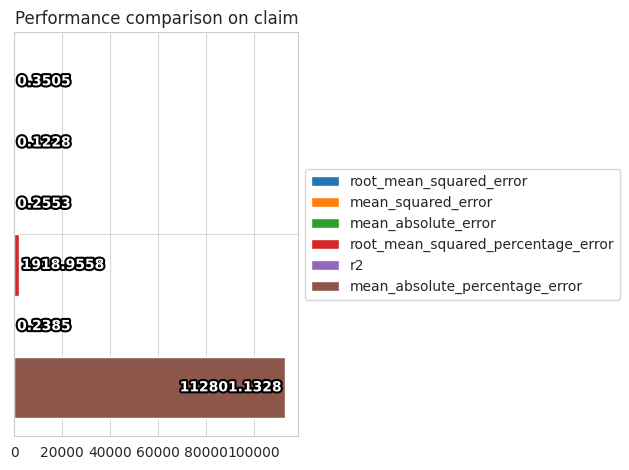

In [10]:
from ludwig.visualize import compare_performance
eval_stats, _, _ = model.evaluate(dataset='insurance_claim_status.csv')
compare_performance([eval_stats])